In [42]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '231110_1000_2kPa_5V_2line_Data'
dataname = data+'_B9'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:28]
SensorData1 = SD1

In [43]:
SD1.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r
count,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,...,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.00000
mean,42.455622,43.255366,50.316812,44.185541,47.925243,60.843485,55.201611,46.900024,58.842062,55.292494,...,44.188682,52.763422,51.785898,52.786785,50.002761,42.452533,14.222886,62.934005,167.847822,2.79970
std,1.987839,2.075121,1.913527,2.088613,1.712182,2.140455,2.347430,2.578516,1.949118,2.286761,...,2.330159,2.450235,2.479412,2.093239,2.226713,2.228545,43.319723,38.629721,103.186839,1.83268
min,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,-424.290000,0.000000,0.000000,0.00000
25%,41.500000,42.100000,49.400000,43.100000,47.100000,60.200000,54.300000,45.700000,57.800000,54.400000,...,42.800000,51.400000,50.500000,51.800000,48.800000,41.400000,0.000000,32.000000,80.000000,1.60000
50%,42.500000,43.200000,50.300000,44.200000,47.900000,61.000000,55.300000,46.800000,58.700000,55.300000,...,44.000000,52.500000,51.700000,52.800000,50.000000,42.400000,9.495000,64.000000,160.000000,2.40000
75%,43.400000,44.300000,51.200000,45.300000,48.800000,61.800000,56.400000,48.000000,59.700000,56.200000,...,45.200000,53.600000,52.800000,53.800000,51.200000,43.500000,28.170000,96.000000,260.000000,4.00000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,57.900000,67.600000,255.000000,255.000000,255.000000,255.000000,10084.300000,128.000000,340.000000,5.60000


In [44]:
SDreal = SD1
SDreal["z"] /= 8
SDreal["z"] *= 10

In [45]:
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r
count,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,...,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.000000,96098.00000
mean,42.455622,43.255366,50.316812,44.185541,47.925243,60.843485,55.201611,46.900024,58.842062,55.292494,...,44.188682,52.763422,51.785898,52.786785,50.002761,42.452533,14.222886,78.667506,167.847822,2.79970
std,1.987839,2.075121,1.913527,2.088613,1.712182,2.140455,2.347430,2.578516,1.949118,2.286761,...,2.330159,2.450235,2.479412,2.093239,2.226713,2.228545,43.319723,48.287152,103.186839,1.83268
min,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,-424.290000,0.000000,0.000000,0.00000
25%,41.500000,42.100000,49.400000,43.100000,47.100000,60.200000,54.300000,45.700000,57.800000,54.400000,...,42.800000,51.400000,50.500000,51.800000,48.800000,41.400000,0.000000,40.000000,80.000000,1.60000
50%,42.500000,43.200000,50.300000,44.200000,47.900000,61.000000,55.300000,46.800000,58.700000,55.300000,...,44.000000,52.500000,51.700000,52.800000,50.000000,42.400000,9.495000,80.000000,160.000000,2.40000
75%,43.400000,44.300000,51.200000,45.300000,48.800000,61.800000,56.400000,48.000000,59.700000,56.200000,...,45.200000,53.600000,52.800000,53.800000,51.200000,43.500000,28.170000,120.000000,260.000000,4.00000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,57.900000,67.600000,255.000000,255.000000,255.000000,255.000000,10084.300000,160.000000,340.000000,5.60000


In [46]:
# SDreal 값이 999이거나 100이상인 이상치 제거
SDreal = SDreal[~(SDreal == 999).any(axis=1)]
SDreal = SDreal[~(SDreal == 255).any(axis=1)]
SDreal = SDreal[~(SDreal == 4).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

# 'Force', 'theta', 'z', 'r' 열을 제외한 열에서 100 이상의 값을 제거
cols_to_exclude = ["Force", "theta", "z", "r"]
cols_to_check = [col for col in SDreal.columns if col not in cols_to_exclude]

SDreal = SDreal[~((SDreal <= 0) & (SDreal.columns == "Force")).any(axis=1)]
SDreal = SDreal[~((SDreal >= 10000) & (SDreal.columns == "Force")).any(axis=1)]


SDreal = SDreal[SDreal["r"] >= 0.8*1]
SDreal = SDreal[SDreal["z"] <= 160]
SDreal = SDreal[SDreal["z"] >= 0]

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r,cos,sin
count,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,...,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,55617.000000,5.561700e+04
mean,42.445468,43.265401,50.275529,44.216921,47.940369,60.816135,55.164052,47.013906,58.923967,55.286928,...,51.865929,52.870139,50.072138,42.476250,24.790959,76.826510,162.133520,3.293784,-0.003970,7.886413e-02
std,1.471256,1.796716,1.415815,1.611676,1.371154,2.010862,1.953761,1.999268,1.717924,1.399322,...,2.105287,1.783136,1.802254,1.538979,22.509537,47.000332,102.835871,1.678818,0.716587,6.930260e-01
min,33.200000,36.800000,42.900000,37.000000,39.200000,38.700000,42.800000,40.200000,50.800000,44.400000,...,44.500000,43.400000,42.600000,35.400000,0.010000,0.000000,0.000000,0.800000,-1.000000,-9.848078e-01
25%,41.500000,42.100000,49.300000,43.200000,47.100000,60.200000,54.300000,45.700000,57.900000,54.400000,...,50.600000,51.800000,48.900000,41.500000,7.460000,40.000000,80.000000,1.600000,-0.766044,-6.427876e-01
50%,42.400000,43.200000,50.200000,44.200000,48.000000,61.000000,55.300000,46.900000,58.800000,55.300000,...,51.700000,52.900000,50.000000,42.500000,19.760000,80.000000,160.000000,3.200000,0.173648,1.224647e-16
75%,43.400000,44.300000,51.200000,45.300000,48.800000,61.900000,56.300000,48.100000,59.800000,56.200000,...,52.900000,53.900000,51.200000,43.500000,35.760000,120.000000,240.000000,4.800000,0.766044,6.427876e-01
max,49.200000,53.300000,58.000000,51.400000,52.800000,66.000000,61.700000,57.400000,70.600000,60.400000,...,64.900000,63.700000,61.200000,49.200000,153.100000,160.000000,340.000000,5.600000,1.000000,9.848078e-01


In [47]:
# 24개의 특성에 대한 평균과 표준편차를 계산합니다.
mean_values = SDreal.iloc[:, :24].mean().values
std_values = SDreal.iloc[:, :24].std().values

mean_values = [round(value, 2) for value in mean_values]
std_values = [round(value, 2) for value in std_values]

print("Xmean = {", ", ".join(map(str, mean_values)), "}")
print("Xstd = {", ", ".join(map(str, std_values)), "}")



min_max_25 = [round(SDreal.iloc[:, 24].min(), 2), round(SDreal.iloc[:, 24].max(), 2)]
min_max_26 = [round(SDreal.iloc[:, 25].min(), 2), round(SDreal.iloc[:, 25].max(), 2)]

print("Fminmax={", ", ".join(map(str, min_max_25)), "}")

print("Zminmax={", ", ".join(map(str, min_max_26)), "}")

Xmean = { 42.45, 43.27, 50.28, 44.22, 47.94, 60.82, 55.16, 47.01, 58.92, 55.29, 53.31, 48.88, 44.01, 47.64, 48.64, 43.6, 51.88, 45.33, 44.27, 52.87, 51.87, 52.87, 50.07, 42.48 }
Xstd = { 1.47, 1.8, 1.42, 1.61, 1.37, 2.01, 1.95, 2.0, 1.72, 1.4, 1.7, 1.28, 1.58, 1.68, 1.48, 1.46, 1.43, 2.67, 2.38, 2.5, 2.11, 1.78, 1.8, 1.54 }
Fminmax={ 0.01, 153.1 }
Zminmax={ 0.0, 160.0 }


In [48]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns

    for column in columns:
        df[column] = transformation(df[column])
    
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

def standardize(column):
    return (column - column.mean()) / column.std()

def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1



SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], submean)

#SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], submean)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], standardize)

SDreal

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r,cos,sin
39,44.5,40.5,50.6,46.8,52.3,62.7,54.2,41.8,62.1,54.5,...,51.3,54.2,51.1,40.7,-0.985499,-1.0,0,-1.000000,1.0,0.000000
40,44.7,40.4,50.5,46.4,52.6,62.8,54.5,42.4,61.9,53.9,...,51.1,54.0,51.0,40.7,-0.987328,-1.0,0,-1.000000,1.0,0.000000
41,44.3,40.5,50.4,46.3,52.8,63.0,54.6,42.6,62.3,54.4,...,50.9,53.8,50.7,40.6,-0.988634,-1.0,0,-1.000000,1.0,0.000000
42,44.9,40.4,49.9,46.7,52.7,63.1,54.3,42.7,62.0,54.9,...,51.6,53.5,51.3,40.4,-0.987589,-1.0,0,-1.000000,1.0,0.000000
43,44.9,40.0,49.7,46.5,52.6,63.0,54.2,42.2,61.9,54.9,...,50.8,53.3,51.2,40.6,-0.986283,-1.0,0,-1.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95843,41.7,44.9,49.8,45.8,49.2,61.4,55.9,47.2,59.7,54.6,...,52.7,50.6,46.5,42.1,-0.998694,1.0,240,-1.000000,-0.5,-0.866025
96023,43.2,44.7,50.6,43.0,48.7,61.2,54.0,49.4,58.9,55.1,...,51.6,50.6,47.1,41.0,-0.984976,1.0,240,0.666667,-0.5,-0.866025
96024,42.8,44.9,50.7,43.3,48.8,61.0,54.0,49.0,59.3,54.7,...,51.5,50.2,47.1,41.0,-0.984323,1.0,240,0.666667,-0.5,-0.866025
96025,43.0,45.3,50.7,43.1,48.6,61.2,54.0,48.6,59.1,54.3,...,51.6,50.1,46.4,41.0,-0.990202,1.0,240,0.666667,-0.5,-0.866025


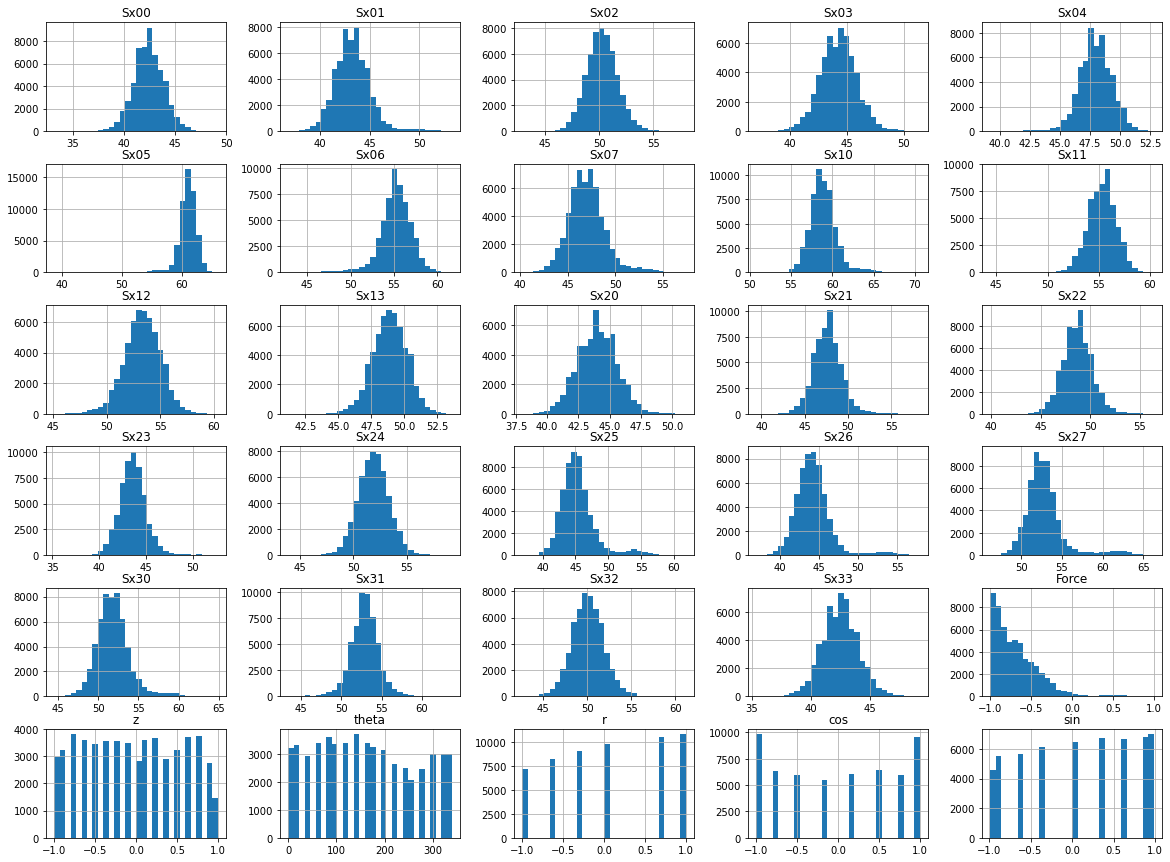

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
SDreal.hist(bins=30, figsize=(20,15))
plt.show()

In [19]:
SDy = SDreal.iloc[:,24:30]
SDy.describe()

,Force,z,theta,r,cos,sin
count,55617.000000,55617.000000,55617.000000,5.561700e+04,55617.000000,5.561700e+04
mean,-0.676256,-0.039669,162.133520,3.907678e-02,-0.003970,7.886413e-02
std,0.294069,0.587504,102.835871,6.995076e-01,0.716587,6.930260e-01
min,-1.000000,-1.000000,0.000000,-1.000000e+00,-1.000000,-9.848078e-01
25%,-0.902672,-0.500000,80.000000,-6.666667e-01,-0.766044,-6.427876e-01
50%,-0.741982,0.000000,160.000000,2.220446e-16,0.173648,1.224647e-16
75%,-0.532954,0.500000,240.000000,6.666667e-01,0.766044,6.427876e-01
max,1.000000,1.000000,340.000000,1.000000e+00,1.000000,9.848078e-01


In [20]:
X = SDreal.iloc[:,0:24]
y = SDreal.iloc[:,[24,25,28,29]]

In [21]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx22,Sx23,Sx24,Sx25,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33
39,44.5,40.5,50.6,46.8,52.3,62.7,54.2,41.8,62.1,54.5,...,48.0,45.4,52.6,43.9,45.5,52.5,51.3,54.2,51.1,40.7
40,44.7,40.4,50.5,46.4,52.6,62.8,54.5,42.4,61.9,53.9,...,47.5,45.2,52.7,43.9,45.4,52.2,51.1,54.0,51.0,40.7
41,44.3,40.5,50.4,46.3,52.8,63.0,54.6,42.6,62.3,54.4,...,47.9,45.0,52.9,44.1,45.0,52.2,50.9,53.8,50.7,40.6
42,44.9,40.4,49.9,46.7,52.7,63.1,54.3,42.7,62.0,54.9,...,48.3,45.0,52.9,43.6,44.8,52.3,51.6,53.5,51.3,40.4
43,44.9,40.0,49.7,46.5,52.6,63.0,54.2,42.2,61.9,54.9,...,48.2,45.0,52.8,43.7,44.4,52.1,50.8,53.3,51.2,40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95843,41.7,44.9,49.8,45.8,49.2,61.4,55.9,47.2,59.7,54.6,...,46.7,42.9,49.3,45.9,43.9,54.0,52.7,50.6,46.5,42.1
96023,43.2,44.7,50.6,43.0,48.7,61.2,54.0,49.4,58.9,55.1,...,48.5,42.5,49.8,48.5,45.1,51.5,51.6,50.6,47.1,41.0
96024,42.8,44.9,50.7,43.3,48.8,61.0,54.0,49.0,59.3,54.7,...,49.2,42.4,49.9,49.3,45.3,51.3,51.5,50.2,47.1,41.0
96025,43.0,45.3,50.7,43.1,48.6,61.2,54.0,48.6,59.1,54.3,...,48.9,42.7,49.7,48.7,45.2,51.2,51.6,50.1,46.4,41.0


In [22]:
y

,Force,z,cos,sin
39,-0.985499,-1.0,1.0,0.000000
40,-0.987328,-1.0,1.0,0.000000
41,-0.988634,-1.0,1.0,0.000000
42,-0.987589,-1.0,1.0,0.000000
43,-0.986283,-1.0,1.0,0.000000
...,...,...,...,...
95843,-0.998694,1.0,-0.5,-0.866025
96023,-0.984976,1.0,-0.5,-0.866025
96024,-0.984323,1.0,-0.5,-0.866025
96025,-0.990202,1.0,-0.5,-0.866025


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)

In [24]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  33369 ea 59 %    X_valid:  11124 ea 20 %    X_test:  11124 ea 20 %


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/231110_1000_2kPa_5V_2line_Data_B9_SS.pkl']

In [27]:
from tensorflow import keras
model = keras.models.Sequential([  
    keras.layers.Dense(512, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),            
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                                                
    keras.layers.Dense(4)    
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12800     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,780
Trainable params: 83,780
Non-trainable params: 0
_________________________________________________________________


## Callback (best, early stopping, tensorboard)

In [28]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'231006_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [29]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [30]:
dataname

'231110_1000_2kPa_5V_2line_Data_B9'

In [31]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 8
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
1043/1043 [==============================] - 3s 2ms/step - loss: 0.2508 - val_loss: 0.1571
Epoch 2/300
1043/1043 [==============================] - 2s 2ms/step - loss: 0.1375 - val_loss: 0.1244
Epoch 3/300
1043/1043 [==============================] - 2s 2ms/step - loss: 0.1060 - val_loss: 0.1106
Epoch 4/300
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0875 - val_loss: 0.0908
Epoch 5/300
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0762 - val_loss: 0.0825
Epoch 6/300
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0672 - val_loss: 0.0725
Epoch 7/300
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0611 - val_loss: 0.0672
Epoch 8/300
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0564 - val_loss: 0.0690
Epoch 9/300
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0525 - val_loss: 0.0635
Epoch 10/300
1043/1043 [==============================] - 2s 2ms/step - l

In [32]:
# %load_ext tensorboard
# %tensorboard --logdir=./mylog/230320_Data --port=2322

In [33]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [34]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df

348/348 [==============================] - 0s 841us/step


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
0,-0.043789,0.498647,-1.005536,-0.051909,-0.983582
1,-0.836265,0.620361,-0.309363,-0.905992,-0.604740
2,-0.652997,0.351563,-0.536617,-0.840856,-0.680806
3,-0.762464,-0.129352,0.685695,-0.613322,-0.232284
4,-0.775476,0.685512,-0.910369,0.109442,0.961917
...,...,...,...,...,...
11119,-0.567065,-0.536945,-0.925320,0.230341,0.922341
11120,-0.620207,0.263023,1.123033,-0.050141,-0.014202
11121,-0.194301,-0.539648,0.809701,0.270031,0.102463
11122,-0.910367,0.527736,1.089313,-0.101959,-0.029707


In [35]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df

,force,z,cos,sin,theta
0,-0.105363,0.500,-1.000000,1.224647e-16,1.000000
1,-0.996081,0.625,-0.173648,-9.848078e-01,-0.555556
2,-0.666732,0.375,-0.500000,-8.660254e-01,-0.666667
3,-0.687112,0.000,0.766044,-6.427876e-01,-0.222222
4,-0.947221,0.500,-0.939693,3.420201e-01,0.888889
...,...,...,...,...,...
11119,-0.477824,-0.500,-0.939693,3.420201e-01,0.888889
11120,-0.483833,0.250,1.000000,0.000000e+00,0.000000
11121,-0.137893,-0.375,0.939693,3.420201e-01,0.111111
11122,-0.754785,0.500,1.000000,0.000000e+00,0.000000


In [36]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)

# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
78.85% force
94.12% z
94.72% cos
94.74% sin
81.74% theta


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
force,0.788503,-0.128463,-0.027699,0.150644,0.108421
z,-0.138708,0.941186,0.01248,0.03885,0.030417
cos,-0.035554,-0.042986,0.947197,-0.112799,-0.147062
sin,0.109531,0.047552,-0.000303,0.947398,0.723556
theta,0.10733,0.045313,-0.176051,0.735298,0.817365


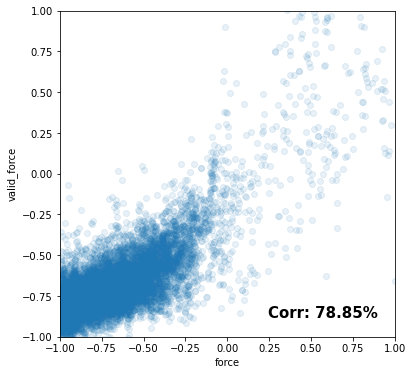

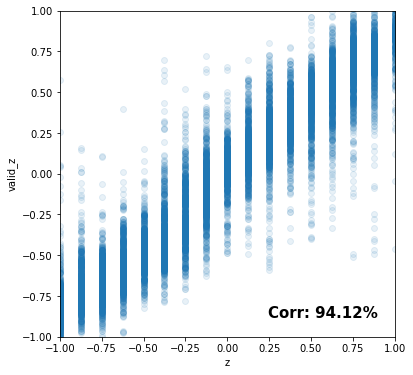

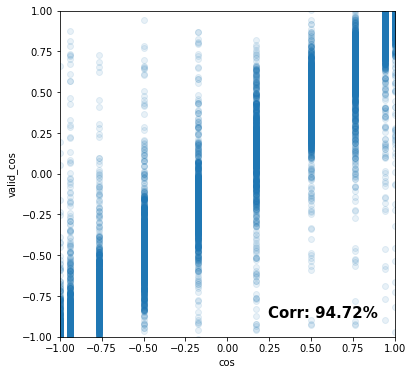

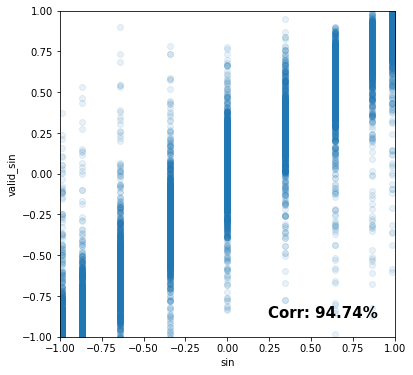

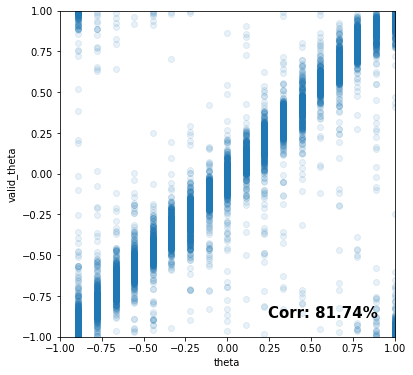

In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig/2line"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta']
#fields = ['force','z','r','cos','sin','theta']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


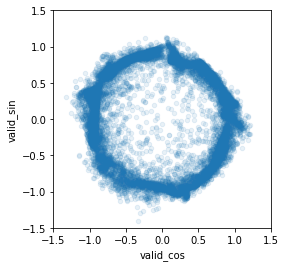

In [38]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

# Display the plot
plt.show()

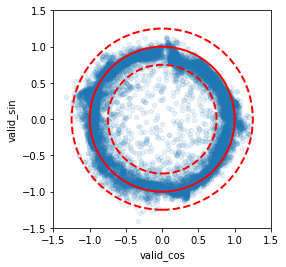

In [39]:
alpha = 0.1  # set alpha value for scatter plot
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# Draw a circle with center at (0, 0) and radius 1
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# Draw offset circles (one inside and one outside the main circle)
offset = 0.25  # adjust the offset value as needed
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=2)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=2)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
# Display the plot
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_offset.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()


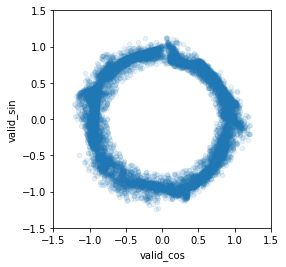

5.573534699748292

In [40]:
ValidPre_filtered = ValidPre[
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 <= (1 + offset)**2) &
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 >= (1 - offset)**2)
]


ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()

total_data_count = len(ValidPre)
filtered_data_count = len(ValidPre_filtered)
percentage_filtered_out = ((total_data_count - filtered_data_count) / total_data_count) * 100
percentage_filtered_out

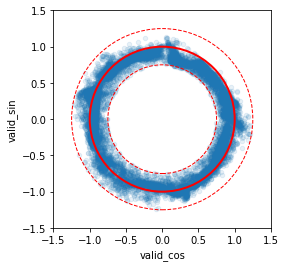

In [41]:
# 기존의 scatter plot을 그립니다.
ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# 중심이 (0, 0)이고 반지름이 1인 실선 원을 추가합니다.
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# 점선 원을 추가합니다. 하나는 내부에, 하나는 외부에 위치합니다.
offset = 0.25  # offset 값을 필요에 따라 조정합니다.
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=1)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=1)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# 그래프의 비율을 1:1로 설정합니다.
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정

# 그래프를 파일로 저장합니다.
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut_offset.png"))

# 그래프를 출력합니다.
plt.show()
